In [2]:
import numpy as np
import pandas as pd

In [12]:
# ARES results - there is no example-level output from ARES, just the results from ues_idp
ares15 = pd.DataFrame([[0.692, 0.711]], columns=['Faithfulness', 'Contextual_Precision'])
ares2 = pd.DataFrame([[0.792, 0.852]], columns=['Faithfulness', 'Contextual_Precision'])
ares = pd.concat([ares15, ares2])
ares.index = [15, 2]

In [13]:
ares

,Faithfulness,Contextual_Precision
15,0.692,0.711
2,0.792,0.852


In [14]:
# Difference between scores for llms with ARES
abs(ares.loc[15] - ares.loc[2])

Faithfulness            0.100
Contextual_Precision    0.141
dtype: float64

In [25]:
# 1/28 comparison of deepeval results across the Gemini 1.5 and Gemini 2.0 Experimental LLMs
# Want to see how consistent metric results are across LLMs
# Overall results: 
# Faithfulness Gemini 1.5 : 0.958
# Faithfulness Gemini 2.0 : 0.967882
dp15f = pd.read_csv("results/deepeval_faithfulness_gemini_15_rag_mini_wikipedia_903.csv", index_col=None)
dp2f = pd.read_csv("results/deepeval_faithfulness_gemini_2_rag_mini_wikipedia_903.csv", index_col=None)
dp2cp = pd.read_csv("results/deepeval_cp_gemini_2_rag_mini_wikipedia_903.csv", index_col=None)
dp15cp = pd.read_csv("results/deepeval_contextprecision_gemini_15_rag_mini_wikipedia_903.csv", index_col=None)

In [27]:
dp15cp

,0
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
898,1.0
899,1.0
900,1.0
901,0.7


In [28]:
dp15f.columns = ['DeepEval_Faithfulness_15']
dp2f.columns = ['DeepEval_Faithfulness_2']
dp15cp.columns = ['DeepEval_ContextualPrecision_15']
dp2cp.columns = ['DeepEval_ContextualPrecision_2']

In [36]:
dp15f_avg = dp15f.mean() # 0.958
dp2f_avg = dp2f.mean() # 0.967882
dp15cp_avg = dp15cp.mean() # 0.792454
dp2cp_avg = dp2cp.mean() # 0.756079
dpf_avg = pd.DataFrame([[dp15f_avg.iloc[0], dp15cp_avg.iloc[0]], [dp2f_avg.iloc[0], dp2cp_avg.iloc[0]]], columns=['Faithfulness', 'Contextual_Precision'])
dpf_avg.index = [15,2]
dpf_avg

,Faithfulness,Contextual_Precision
15,0.958000,0.792454
2,0.967882,0.756079


In [37]:
dpf_avg

,Faithfulness,Contextual_Precision
15,0.958000,0.792454
2,0.967882,0.756079


In [39]:
# Difference between scores for llms with DeepEval
abs(dpf_avg.loc[15] - dpf_avg.loc[2])

Faithfulness            0.009882
Contextual_Precision    0.036374
dtype: float64

In [55]:
dpllm_results = pd.concat([dp15f, dp2f, dp15cp, dp2cp], axis=1, ignore_index=False)

In [56]:
dpllm_results

,DeepEval_Faithfulness_15,DeepEval_Faithfulness_2,DeepEval_ContextualPrecision_15,DeepEval_ContextualPrecision_2
0,1.0,1.0,1.0,1.000000
1,1.0,1.0,1.0,1.000000
2,1.0,1.0,0.0,0.000000
3,1.0,1.0,1.0,1.000000
4,1.0,1.0,1.0,1.000000
...,...,...,...,...
898,1.0,1.0,1.0,0.700000
899,1.0,1.0,1.0,1.000000
900,1.0,1.0,1.0,1.000000
901,1.0,1.0,0.7,0.809524


In [58]:
# stopped here 1/29, next is doing the below for the Contextual Precision results
# DeepEval Faithfulness metric analysis
# lets see how far apart the average result was
# 821/903 rows were within 0.1 score of each other (90.9%)
# 832/903 rows were within 0.2 score of each other (92.1%)
# 840/903 rows were within 0.3 score of each other, (93.0%)
# so 63/903 were > 0.3 score of each other (7%)
# average difference between results was 0.05356... so results seem fairly close together across LLMs
# np.mean(abs(dpllm_results['DeepEval_Faithfulness_15'] - dpllm_results['DeepEval_Faithfulness_2']))
dpllm_results[abs(dpllm_results['DeepEval_Faithfulness_15'] - dpllm_results['DeepEval_Faithfulness_2']) > 0.3].count()

DeepEval_Faithfulness_15           63
DeepEval_Faithfulness_2            63
DeepEval_ContextualPrecision_15    63
DeepEval_ContextualPrecision_2     63
dtype: int64

In [59]:
# Contextual Precision analysis
# lets see how far apart the average result was
# 598/903 rows were within 0.1 score of each other (66.2%)
# 679/903 rows were within 0.2 score of each other (75.2%)
# 728/903 rows were within 0.3 score of each other, (80.6%)
# so 175/903 were > 0.3 score of each other (%)
# average difference between results was 0.1452.... so results did vary across the LLMs on an example by example basis
# np.mean(abs(dpllm_results['DeepEval_ContextualPrecision_15'] - dpllm_results['DeepEval_ContextualPrecision_2']))
dpllm_results[abs(dpllm_results['DeepEval_ContextualPrecision_15'] - dpllm_results['DeepEval_ContextualPrecision_2']) <= 0.1].count()

DeepEval_Faithfulness_15           598
DeepEval_Faithfulness_2            598
DeepEval_ContextualPrecision_15    598
DeepEval_ContextualPrecision_2     598
dtype: int64

In [54]:
728/903

0.8062015503875969

<Axes: ylabel='Frequency'>

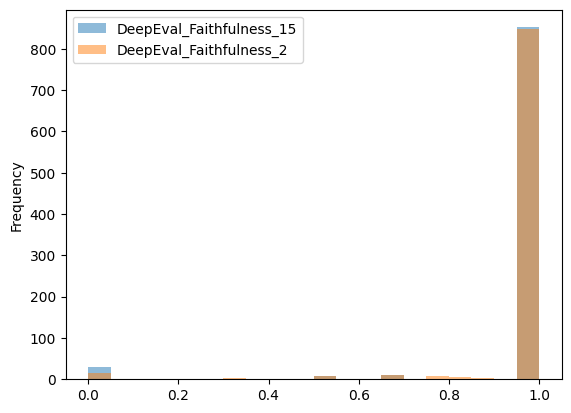

In [23]:
# faithfulness scores tended to be either 0 or 1 and stayed pretty consistent across LLMs
dpllmf_results.plot.hist(column=['DeepEval_Faithfulness_15', 'DeepEval_Faithfulness_2'], bins=20, alpha=0.5)

<Axes: ylabel='Frequency'>

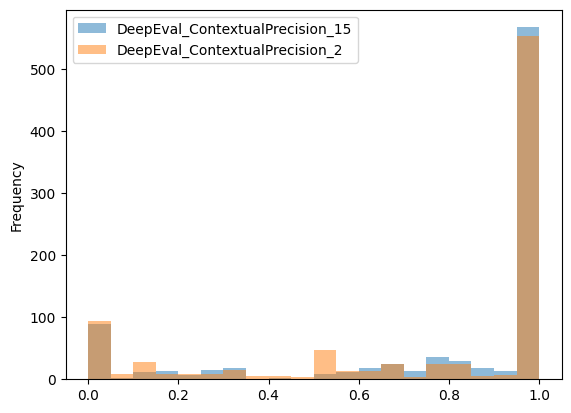

In [60]:
# contextual precision scores varied more but still seemed to overlap across LLMs; 
# Of course, this isn't showing the example vs example view
dpllm_results.plot.hist(column=['DeepEval_ContextualPrecision_15', 'DeepEval_ContextualPrecision_2'], bins=20, alpha=0.5)

In [61]:
# compare across libraries
# Difference between ARES and DeepEval 
abs(ares - dpf_avg)

,Faithfulness,Contextual_Precision
15,0.266000,0.081454
2,0.175882,0.095921


In [2]:
# 12/11 comparison of results from deepeval and ragas
# This was using a dataset synthetically generated by deepeval
# Just comparing Contextual Precision metric with Gemini 1.5 LLM
deepeval_results = pd.read_csv("results/deepeval_contextprecision_unlabeled.csv", index_col=None)
ragas_results = pd.read_csv("results/results_ragas_unlabeled_all.csv", index_col=None)

In [3]:
results = pd.concat([ragas_results, deepeval_results], axis=1, ignore_index=False)

In [4]:
results = results.rename(columns={'context_precision': 'ragas_cp', 'score':'deepeval_cp'})

In [6]:
# 169/800 rows were within 0.1 score of each other
# 234/800 rows were within 0.2 score of each other
# 278/800 rows were within 0.3 score of each other, 
# so 522/800 were > 0.3 score of each other
# average difference between results was 0.5409... this tells me they were really far apart, given a restricted scoring range of 0-1
np.mean(abs(results['ragas_cp'] - results['deepeval_cp']))

0.540941989035695

<Axes: ylabel='Frequency'>

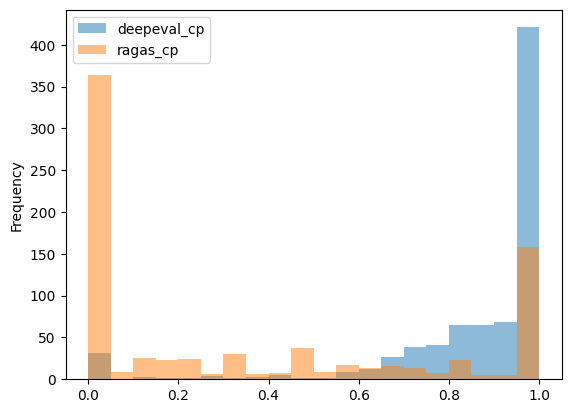

In [7]:
results.plot.hist(column=['deepeval_cp', 'ragas_cp'], bins=20, alpha=0.5)

<Axes: ylabel='Frequency'>

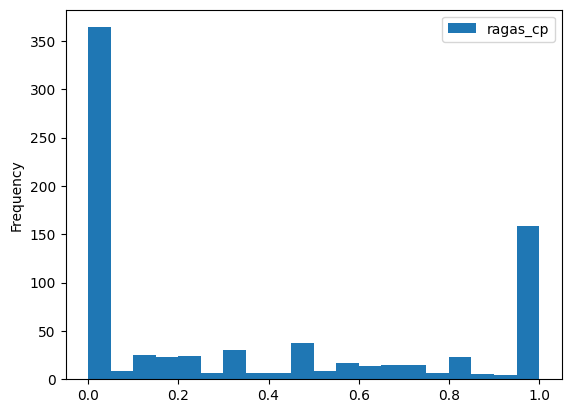

In [8]:
results.plot.hist(column=['ragas_cp'], bins=20)

In [9]:
results.to_csv("results/ragas_and_deepeval_unlabeled_results.csv", index=False)

In [ ]:
# for my manual comparison review of results (above)
import random
for i in range(0,15):
    print(random.randint(2, 801))

# 109
# 154
# 400
# 163
# 741
# 704
# 126
# 167
# 724
# 18
# 379
# 51
# 514
# 556
# 586